# PCA
- **PCA** とは、**Principal Component Analysis** の略
- 日本語では**主成分分析（しゅせいぶんぶんせき）**
- **次元削減（じげんさくげん）**に用いられる手段
- 次元削減 … データの次元数を減らすこと
- 特徴量を抽出することによって、データセット内の特徴量を削減することができる

## PCAの考え方

1. 全データの重心（平均値）を算出
2. 重心からデータの**分散**（ばらつき）が最大となる方向（**第1主成分**）を算出
3. 第1主成分と直角に交わる（直交）方向で分散が最大となる箇所（**第2主成分**）を算出
<div>
<img src="img/PCA（3D）.png" width="500px">
</div>
4. 直近の主成分と直交する方向で分散が最大となる箇所（第3主成分）を算出
5. 4.をデータの次元分だけ繰り返す

## PCAの重要なキーワード


- **寄与率（きよりつ）**
    - 主成分だけで元のデータの何割を説明することができているかを表す数値

- **累積寄与率（るいせききよりつ）**
    - 第2、第3と続く主成分の各寄与率を足した数値
    - 一般的に累積寄与率が80％以上となるまでの主成分を分析に使用


- **主成分得点(しゅせいぶんとくてん)**
    -  データが各主成分の軸上でとる値
    -  この値の大小から各個体の各主成分における傾向や関係を把握することができる



## 1.データの準備
- irisのデータを読み込んで準備をする
- 各パラメータと分類の関係を可視化する

### sample1
- numpyおよびmatplotlibのインポート

In [1]:
# numpyのインポート
import numpy as np
# matplotlibのインポート
import matplotlib.pyplot as plt

### sample2
- irisのデータの読み取り

In [2]:
#データの準備
from sklearn.datasets import load_iris
dataset = load_iris()
 
#データの整理
target_names = dataset.target_names #ターゲット(花の種類)の名前リスト
targets = dataset.target #ターゲットに与えられた番号
feature_names = dataset.feature_names #特徴名リスト
features = dataset.data #各特徴のデータ

### sample3
- 読み取ったデータをDataFrameにまとめる

In [3]:
import pandas as pd
from pandas import DataFrame
df = DataFrame(features, columns = feature_names)
df['target'] = target_names[targets]
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

### sample4
- seabornを用いて各パラメータのペアを描写
- seabornとは
    - pythonのデータ可視化ライブラリ
    - matplotlibと比べて少ないコードで図が描ける
- パラメータのすべて組み合わせでの分類を可視化する

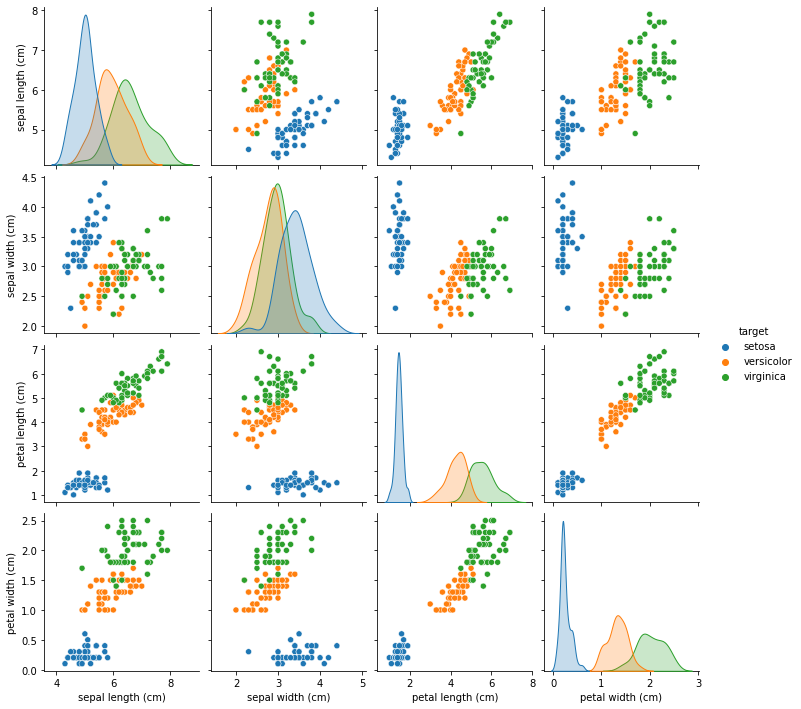

In [4]:
#　4次元を表すグラフ
import seaborn as sns
sns.pairplot(df, hue='target')
plt.show()

## 2.次元削減①（4次元から3次元へ）
- PCAで4次元のirisのデータを3次元に次元削減する
- 結果を三次元のグラフに描画する

### sample5
- データの削減
- PCAクラスを利用
- 引数n_componentsで削減するターゲットとなる次元3を指定
- fit_transformで主成分得点を得る

In [5]:
#4次元のデータを3次元へ
from sklearn.decomposition import PCA
# 3次元への変換
pca3 = PCA(n_components=3)
#　主成分得点を得る
transformed = pca3.fit_transform(features)#featuresを3次元に変換
transformed

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

### sample6
- 得られた主成分の方向ベクトル（単位ベクトル）
- ４次元のベクトルが3つ得られている
    - 第1主成分軸 … (0.36138659, -0.08452251,  0.85667061,  0.3582892)
    - 第2主成分軸 … (0.65658877,  0.73016143, -0.17337266, -0.07548102)
    - 第3主成分軸 … (-0.58202985,  0.59791083,  0.07623608,  0.54583143)

In [6]:
pca3.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

### sample7
- PCAの固有ベクトル

In [7]:
# PCA の固有ベクトル
pd.DataFrame(pca3.components_, columns=df.columns[:4],index=["PC{}".format(x + 1) for x in range(len(pca3.components_))])

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.361387         -0.084523           0.856671          0.358289
PC2           0.656589          0.730161          -0.173373         -0.075481
PC3          -0.582030          0.597911           0.076236          0.545831

### sample8
- 変換後のデータをグラフに表示
- np.unique … 配列の重複を解消

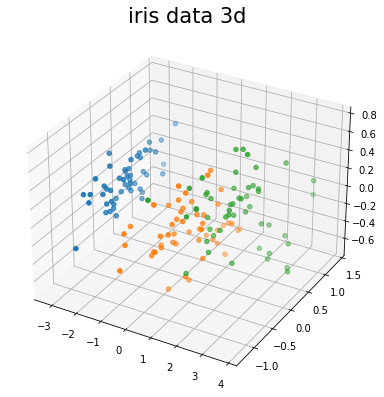

In [8]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize = (6, 5))
ax = Axes3D(fig)
plt.title('iris data 3d',fontsize = 21)
# 点にラベルを付けて表示
for label in np.unique(targets):
    p = ax.scatter(transformed[targets == label, 0],
                   transformed[targets == label, 1],
                   transformed[targets == label, 2],
                   marker = 'o', s = 20)
plt.show()

### sample9
- 各次元の寄与率を得る
    - 第1主成分 …  0.92461872
    - 第2主成分 …  0.05306648
    - 第3主成分 …  0.01710261
- 第1主成分だけで、92%の説明が出来ていることが分かる

In [9]:
# 寄与率を得る
pca3.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

## 3.次元削減②（4次元から2次元へ）
- PCAで4次元のirisのデータを2次元に次元削減する
- 結果をニ次元のグラフに描画する

### sample10
- 4次元のデータを2次元に
- 主成分得点を得る

In [10]:
# 4次元のデータを2次元へ
pca2 = PCA(n_components=2)
transformed = pca2.fit_transform(features)#featuresを2次元に変換
transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

### sample11
- 得られた主成分の方向ベクトル（単位ベクトル）
- ４次元のベクトルが3つ得られている
    - 第1主成分軸 … (0.36138659, -0.08452251,  0.85667061,  0.3582892)
    - 第2主成分軸 … (0.65658877,  0.73016143, -0.17337266, -0.07548102)

In [11]:
pca2.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

### sample12
- PCAの固有ベクトル

In [12]:
# PCA の固有ベクトル
pd.DataFrame(pca2.components_, columns=df.columns[:4],index=["PC{}".format(x + 1) for x in range(len(pca2.components_))])

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.361387         -0.084523           0.856671          0.358289
PC2           0.656589          0.730161          -0.173373         -0.075481

### sample13
- 各次元の寄与率を得る
    - 第1主成分 …  0.92461872
    - 第2主成分 …  0.05306648
- 第1主成分だけで、92%の説明が出来ていることが分かる

In [13]:
# 寄与率を得る
pca2.explained_variance_ratio_

array([0.92461872, 0.05306648])

### sample14
- 変換後のデータをグラフに表示

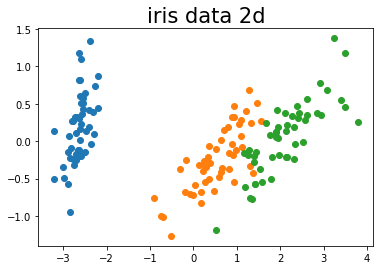

In [14]:
#2次元グラフの出力
import numpy as np
 
for label in np.unique(targets):#[0,1,1,1,1,2]が[0,1,2]になる。重複を避ける
    plt.scatter(transformed[targets == label, 0],transformed[targets == label, 1])
    
plt.savefig('iris data 2d')
plt.title('iris data 2d',fontsize = 21)
plt.show()